<a href="https://colab.research.google.com/github/clevercatme/Python/blob/main/Export_Analysis_wrt_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Import all required libraries
import warnings
from prettytable import PrettyTable
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import altair as alt
import math
import sys
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.cluster import DBSCAN  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from google.colab import files

from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules

alt.renderers.enable('default')

warnings.filterwarnings('ignore')
pd.set_option('precision', 2)

In [ ]:
#upload dataset for all countries
#df = pd.read_csv('/content/2021-2010_export.csv',encoding='cp437', skipinitialspace = True)
#df = pd.read_csv('/content/2021-2010_export2.csv',encoding='unicode_escape', skipinitialspace = True)
#download csv from https://drive.google.com/file/d/1Ro6a1_Zd9YrKEdbZlYW4IGLXUUES8cuU/view?usp=sharing
df = pd.read_csv('/content/2021-2010_export.csv',encoding='unicode_escape')
# df = pd.read_csv('/content/USA AMOUNT_2019to2021.csv',encoding='unicode_escape')
#checking missing values
null_values=df.isnull().sum()
print(null_values)

HSCode           0
Commodity        0
value        14043
country          0
year             0
dtype: int64


In [ ]:

len(df.index)
#droping missing values 
df.dropna(inplace=True)
print(df.isnull().sum())
df.info()
df['Commodity']=df['Commodity'].str.strip()
unique_export_commodities = df.Commodity.unique().tolist()
print(len(unique_export_commodities))

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125874 entries, 0 to 139916
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   HSCode     125874 non-null  int64 
 1   Commodity  125874 non-null  object
 2   value      125874 non-null  object
 3   country    125874 non-null  object
 4   year       125874 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 5.8+ MB
98


In [ ]:
#testing values for only 1 country
#test_df =df.loc[(df['country'].isin(['CHINA P RP']))] 
#test_df.head(9000)
#data of top 10 export partner's of india is stored in export_data
export_data=df.loc[(df['country'].isin(['U S A', 'U ARAB EMTS','CHINA P RP','BANGLADESH PR','NETHERLAND','HONG KONG','SINGAPORE','BELGIUM','GERMANY','U K']))]

In [ ]:
export_data.head(30)
export_data.info()
#type casting

# export_data['quantity'] = pd.to_numeric(export_data['quantity'], errors='coerce')
# print(type(export_data['quantity']))
export_data['value'] = pd.to_numeric(export_data['value'], errors='coerce')
print(type(export_data['value']))
export_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11492 entries, 1037 to 139916
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HSCode     11492 non-null  int64 
 1   Commodity  11492 non-null  object
 2   value      11492 non-null  object
 3   country    11492 non-null  object
 4   year       11492 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 538.7+ KB
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11492 entries, 1037 to 139916
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     11492 non-null  int64  
 1   Commodity  11492 non-null  object 
 2   value      11455 non-null  float64
 3   country    11492 non-null  object 
 4   year       11492 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 538.7+ KB


In [ ]:
#type casting
#export_data['value'] = pd.to_numeric(export_data['value'], errors='coerce')
#print(type(export_data['value']))
##export_data = export_data.replace(',', '', regex=True)
#export_data.describe()
export_data.head(9000)
#NaN values dropped
export_data.dropna(inplace=True)
export_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11455 entries, 1037 to 139916
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     11455 non-null  int64  
 1   Commodity  11455 non-null  object 
 2   value      11455 non-null  float64
 3   country    11455 non-null  object 
 4   year       11455 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 537.0+ KB


In [ ]:
#styling dataframe describe table
styles = [
    dict(selector="tr:hover", props=[("background", "#f4f4f4")]),
    dict(selector="th",
         props=[("color", "#000000"), ("border", "1px solid #eee"),
                ("padding", "12px 35px"), ("border-collapse", "collapse"),
                ("background", "#FFD700"), ("font-size", "18px")]),
    dict(selector="caption",
         props=[
             ("caption-side", "top"),
             ("font-size", "25px"),
             ("border", "1px solid #eee"),
             ("padding", "12px 35px"),
         ]),
]
export_data.head(20).style.set_table_styles(styles).highlight_null(
    null_color='#FF8C00').set_caption(
        "Highlighting null Values of Export Data")
export_data.describe().style.set_table_styles(styles).highlight_min(
    color='#E9967A').set_caption(
        "Short Summary of Numerical Varaibles of Export Data")
   

,HSCode,quantity,value,year
count,182.000000,182.000000,182.000000,182.000000
mean,49.752747,111277.096758,148.913242,2020.324176
std,28.659544,419045.992898,211.978200,0.664297
min,2.000000,0.080000,0.000000,2019.000000
25%,24.250000,548.385000,6.435000,2020.000000
50%,48.000000,15565.335000,61.985000,2020.000000
75%,74.750000,78371.492500,190.802500,2021.000000
max,98.000000,5166965.190000,923.360000,2021.000000


In [ ]:
print("No of Rows in Export Data where value is zero =", len(export_data[export_data['value'] == 0]))

No of Rows in Export Data where value is zero = 4


In [ ]:
#export_data['value'] = export_data['value'].apply(lambda x: float(x.split()[0].replace(',', '')))
#export_data['value'] = (df[column].str.split()).apply(lambda x: float(x[0].replace(',', '')))
# Fix some long Commodity names
dic = {
    'PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.':
    'ANIMAL PRODUCTS',
    'NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.':
    'NUCLEAR EQUIPMENT',
    'OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;':
    'OPTICAL INSTRUMENTS',
    'FURNITURE; BEDDING, MATTRESSES, MATTRESS SUPPORTS, CUSHIONS AND SIMILAR STUFFED FURNISHING; LAMPS AND LIGHTING FITTINGS NOT ELSEWHERE SPECIFIED OR INC':
    'FURNITURE',
    'ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.':
    'ELECTRICAL MACHINERY',
    'RAILWAY OR TRAMWAY LOCOMOTIVES, ROLLING-STOCK AND PARTS THEREOF; RAILWAY OR TRAMWAY TRACK FIXTURES AND FITTINGS AND PARTS THEREOF; MECHANICAL':
    'RAILWAY MACHINERY',
    'TANNING OR DYEING EXTRACTS; TANNINS AND THEIR DERI. DYES, PIGMENTS AND OTHER COLOURING MATTER; PAINTS AND VER; PUTTY AND OTHER MASTICS; INKS.':
    'TANNING  EXTRACTS',
    'PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEANS, MOLLUSCS OR OTHER AQUATIC INVERTEBRATES':
    'PREPARATIONS OF NONVEG FOOD',
    'EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.':
    'EXPLOSIVES',
    'VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.':
    'VEGETABLE PLAITING MATERIALS',
    'ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.':
    'CLOTHING',
    'OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS':
    'TEXTILES',
    'VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.':
    'SPARE PARTS'
}
export_data['Commodity'] = export_data['Commodity'].replace(dic)
export_data.head(30)


,HSCode,Commodity,value,country,year
1037,1,LIVE ANIMALS.,0.91,BANGLADESH PR,2018
1038,2,MEAT AND EDIBLE MEAT OFFAL.,9.06,BANGLADESH PR,2018
1039,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",17.75,BANGLADESH PR,2018
1040,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,39.07,BANGLADESH PR,2018
1041,5,ANIMAL PRODUCTS,0.79,BANGLADESH PR,2018
1042,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.15,BANGLADESH PR,2018
1043,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,176.53,BANGLADESH PR,2018
1044,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,84.43,BANGLADESH PR,2018
1045,9,"COFFEE, TEA, MATE AND SPICES.",150.14,BANGLADESH PR,2018
1046,10,CEREALS.,301.34,BANGLADESH PR,2018


In [ ]:
#spec_chars = ["!",'"',"#","%","&","'","(",")",
#              "*","+",",","-",".","/",":",";","<",
#              "=",">","?","@","[","\\","]","^","_",
#              "`","{","|","}","~","–"]
#for char in spec_chars:
#    export_data['Commodities'] = export_data['Commodities'].str.replace(char, ' ')

#export_data['Commodities'] = export_data['Commodities'].str.split().str.join(" ")
#sns.heatmap(export_data.isnull(), cmap='viridis')

In [ ]:
export_data.country = export_data.country.replace({
    'U K': 'UK',
    'U S A': 'USA',
    'BANGLADESH PR': 'BANGLADESH',
    'CHINA P RP': 'CHINA'
})




unique_export_country = export_data.country.unique().tolist()
print(unique_export_country)
export_data.loc[export_data['country'] == 'USA', 'Ccode'] = 1 
export_data.loc[export_data['country'] == 'UK', 'Ccode'] = 2
export_data.loc[export_data['country'] == 'U ARAB EMTS', 'Ccode'] = 3
export_data.loc[export_data['country'] == 'SINGAPORE', 'Ccode'] = 4
export_data.loc[export_data['country'] == 'NETHERLAND', 'Ccode'] = 5
export_data.loc[export_data['country'] == 'HONG KONG', 'Ccode'] = 6
export_data.loc[export_data['country'] == 'GERMANY', 'Ccode'] = 7
export_data.loc[export_data['country'] == 'CHINA', 'Ccode'] = 8
export_data.loc[export_data['country'] == 'BELGIUM', 'Ccode'] = 9
export_data.loc[export_data['country'] == 'BANGLADESH', 'Ccode'] = 10
#export_data.drop(['Status'], axis=1,inplace=True)
export_data.describe()
export_data.info()

['BANGLADESH', 'BELGIUM', 'CHINA', 'GERMANY', 'HONG KONG', 'NETHERLAND', 'SINGAPORE', 'U ARAB EMTS', 'UK', 'USA']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11455 entries, 1037 to 139916
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     11455 non-null  int64  
 1   Commodity  11455 non-null  object 
 2   value      11455 non-null  float64
 3   country    11455 non-null  object 
 4   year       11455 non-null  int64  
 5   Ccode      11455 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 626.4+ KB


In [ ]:
#EDA
#Descriptive Analysis
#sorting by latest year
export_data = export_data.sort_values(by = ['year','country'], ascending=False)
export_data.head()

,HSCode,Commodity,value,country,year
137799,2,MEAT AND EDIBLE MEAT OFFAL.,0.29,USA,2021
137800,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",2678.30,USA,2021
137801,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,154.32,USA,2021
137802,5,ANIMAL PRODUCTS,2.11,USA,2021
137803,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,29.83,USA,2021


In [ ]:
#number of unique commodities
unique_export_commodities = export_data.Commodity.unique().tolist()
print(len(unique_export_commodities))


98


In [ ]:
#top 10 commodities
top10_commidity = export_data.groupby('Commodity')['Commodity','value'].aggregate('sum')
# print(result)
top10_commidity=top10_commidity.sort_values(by='value',ascending=False)
top10_commidity.head(10)

,value
Commodity,
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",429586.46
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",239024.05
NUCLEAR EQUIPMENT,86689.28
ORGANIC CHEMICALS,72315.87
PHARMACEUTICAL PRODUCTS,70198.99
ELECTRICAL MACHINERY,69506.14
CLOTHING,58162.30
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",54402.19
COTTON.,51834.46


In [ ]:
#years having highest export
year_export = export_data.groupby('year')['year','value'].aggregate('sum')
year_export=year_export.sort_values(by='value',ascending=False)
print(year_export.value)

year
2021    206733.55
2018    166821.36
2019    157847.84
2011    155164.81
2017    153710.01
2012    148978.68
2013    147561.48
2020    146007.65
2014    145970.58
2016    140427.30
2015    131182.65
2010    124167.60
Name: value, dtype: float64


In [ ]:
#which year had highest export
year = export_data.year.value_counts().head(1).index[0]
print("The Year Which has most Export Transactions wrt commodity=", year)

The Year Which has most Export Transactions wrt commodity= 2011


In [ ]:
#EDA
#Visualisation
#bar plot: yearwise value of export
df1 = export_data.groupby('year', as_index=False).agg({
    "value": "sum"
}).rename(columns={'value': 'Export'})
df1['Growth in Export'] = df1.set_index('year')['Export'].pct_change().values

fig = go.Figure(data=([
    go.Bar(x=df1.year,
           y=df1.Export,
           marker={"color": "#FF3900"},
           name="Export",
           textangle=0,
           textfont={'size': 12},
           texttemplate='%{y:.2s}',
           textposition='outside')
]))
fig.update_layout(
    title="Bar Plot of  Export from 2010 to 2021",
    xaxis_title="Year",
    yaxis_title="Value in USD",
    template='seaborn')
fig.show()

In [ ]:
#bar plot: countrywise value of export
df2 = export_data.groupby('country', as_index=False).agg({
    "value": "sum"
}).rename(columns={'value': 'Export'})
df2['Growth in Export'] = df2.set_index('country')['Export'].pct_change().values

fig = go.Figure(data=([
    go.Bar(x=df2.country,
           y=df2.Export,
           marker={"color": "pink"},
           name="Export",
           textangle=0,
           textfont={'size': 12},
           texttemplate='%{y:.2s}',
           textposition='outside')
]))
fig.update_layout(
    title="countrywise export value",
    xaxis_title="country",
    yaxis_title="Value",
    template='seaborn')
fig.show()

In [ ]:
# Interactive plot of Export to countries through years.
unique_countries = sorted(list(export_data.country.unique()))
default = unique_countries[0]

fig = go.Figure()
buttons, countries = [], []

for country in unique_countries:
    df = export_data[export_data.country == country]
    new_df = df.groupby('year', as_index=False).agg({'value': np.sum})

    fig.add_trace(
        go.Scatter(x=new_df['year'],
                   y=new_df['value'],
                   visible=(country == default),
                   mode='markers+lines',
                   name=country,
                   marker_color='#00FFFF'))

    countries.extend([country])

for country in unique_countries:
    buttons.append(
        dict(method='update',
             label=country,
             args=[{
                 'visible': [country == r for r in countries]
             }]))

fig.update_layout(
    showlegend=False,
    title_text='Line Chart of Export Value to Countries throughout Years.',
    title_font_color='#FF8C00',
    title_font_size=25,
    updatemenus=[{
        "buttons": buttons,
        "font": {
            'color': '#000080'
        },
        "direction": "down",
        "active": unique_countries.index(default),
        "showactive": True,
        "x": 1,
        "y": 1.08,
        'xanchor': 'right',
        'bgcolor': '#DEB887'
    }],
    template='plotly_dark')
fig['layout']['xaxis'].update(title_text='Years',
                              title_font_color='#00FA9A',
                              title_font_size=20)
fig['layout']['yaxis'].update(title_text='USD (in Millions)',
                              title_font_color='#00FA9A',
                              title_font_size=20)
fig.show()

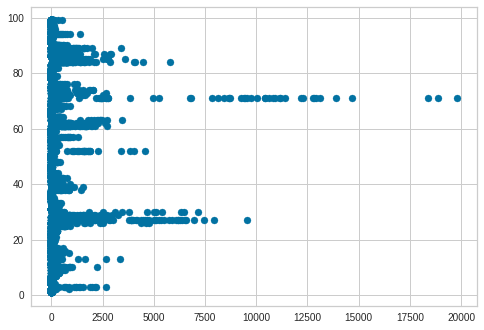

KeyboardInterrupt: ignored

In [ ]:
x= list(export_data.value)
y = list(export_data.HSCode)
plt.scatter(x, y)
plt.show()

data = list(zip(x, y))

data_scaled = normalize(data)
linkage_data = linkage(data_scaled, method='ward', metric='euclidean')
# linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [ ]:
#--------------------Davies Bouldin score for hierarchical models-------------------------
from sklearn.metrics import davies_bouldin_score
def get_Hmeans_score(
    data, distance, link, center
):  #--------------------- We can specify linkage and distance
    """
    returns the  score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit Agglomerative to
        distance - the distance for AgglomerativeClustering
        link - the linkage method for AgglomerativeClustering
        center - the number of clusters you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the Hierarchical model fit to the data
    """
    #---------------instantiate Hierarchical Clustering
    
    hmeans = AgglomerativeClustering(n_clusters=center, affinity=distance, linkage=link)
    
    #---------------Then fit the model to the data using the fit method
    model = hmeans.fit_predict(data)
#---------------Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    return score

Text(0.5, 1.0, 'Davies Bouldin score vs. K')

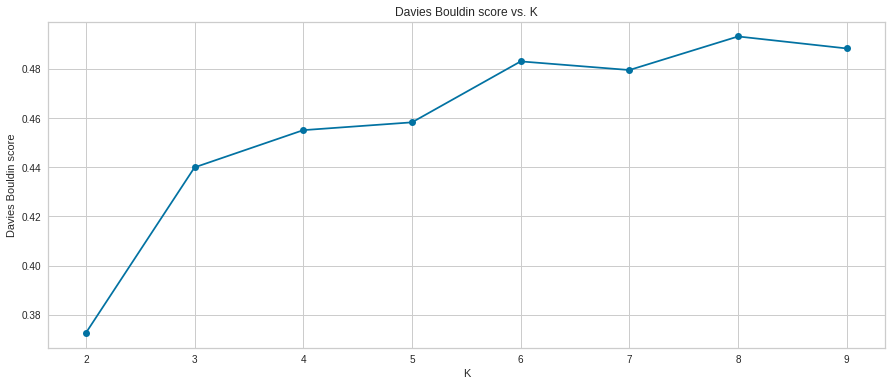

In [ ]:
centers = list(range(2, 10)) #------Number of Clusters in the data
avg_scores = []
for center in centers:
 avg_scores.append(get_Hmeans_score(data_scaled, "euclidean", "average", center))
plt.figure(figsize=(15,6));
 
plt.plot(centers, avg_scores, linestyle= '-', marker="o", color="b")
plt.xlabel("K")
plt.ylabel("Davies Bouldin score")
plt.title("Davies Bouldin score vs. K")

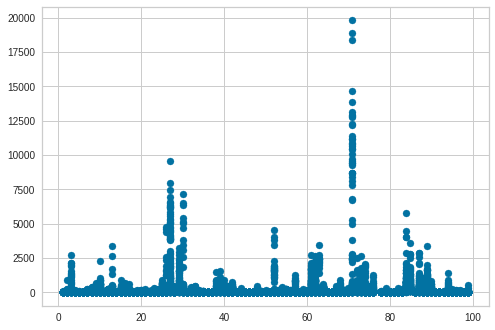

In [ ]:
#x = export_data.iloc[:,:-1].values
#Kmeans

x_kmean= list(export_data.HSCode)
y_kmean = list(export_data.value)
# Hscode.dropna(inplace=True)
plt.scatter(x_kmean, y_kmean)
plt.show()



In [ ]:
data = np.array(list(zip(x, y)))
print(len(data))
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
# data=pd.DataFrame(data)
# list.remove(nan)
# data = [item for item in data if not(math.isnan(item[0])) == True]
# print(data)

11455


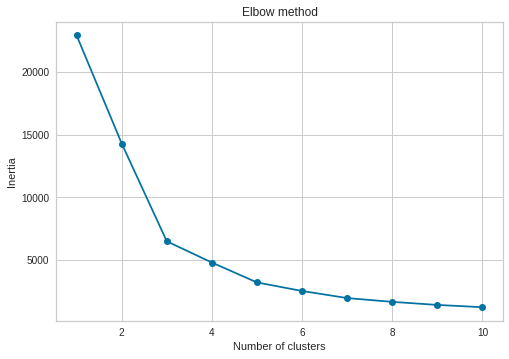

In [ ]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

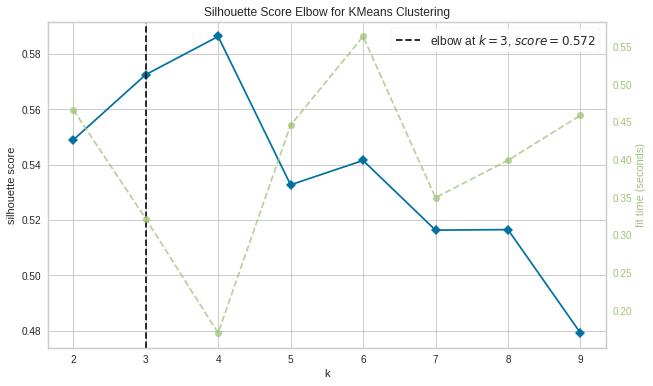

In [ ]:
plt.figure(figsize=(10,6))
model = KMeans(random_state=1)
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric="silhouette", timings=True
)
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and generate the plot

{2: 6908.707218250737, 3: 14499.893885467396, 4: 14435.194826773091, 5: 17592.95556757242, 6: 18532.205054694114, 7: 20421.380924512017, 8: 20946.11443361912, 9: 21818.698346318666, 10: 22555.942353763898}


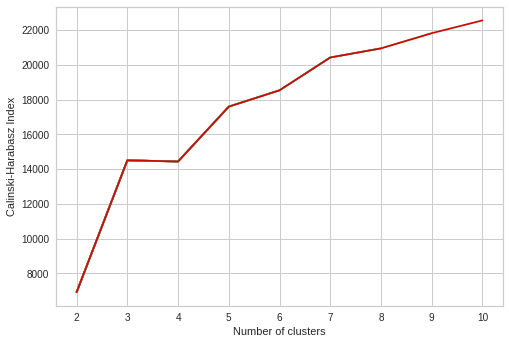

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(data)
    db_index = calinski_harabasz_score(data, labels)
    results.update({i: db_index})
    plt.plot(list(results.keys()), list(results.values()))

print(results)
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

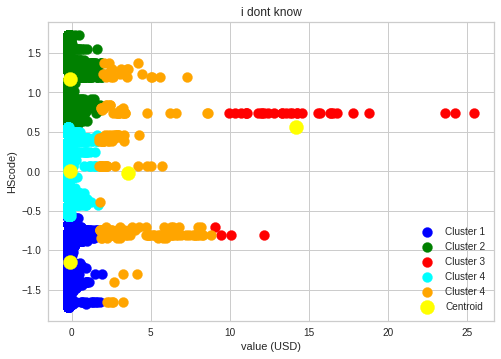

0.5587447355133498


In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(data)
np.set_printoptions(threshold=sys.maxsize)
print(y_predict)

#visulaizing the clusters  

plt.scatter(data[y_predict == 0, 0], data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(data[y_predict == 1, 0], data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(data[y_predict== 2, 0], data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(data[y_predict == 3, 0], data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(data[y_predict == 4, 0], data[y_predict == 4, 1], s = 100, c = 'orange', label = 'Cluster 4') #for fourth cluster 
# plt.scatter(data[y_predict == 5, 0], data[y_predict == 5, 1], s = 100, c = 'voilet', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   
plt.title('i dont know')  
plt.xlabel('value (USD)')  
plt.ylabel('HScode)')  
plt.legend()  
plt.show()  

#vaidation matrix Davies-Bouldin Index :
#ratio between the cluster scatter and the cluster's separation and a lower value will mean that the clustering is better
from sklearn.metrics import davies_bouldin_score
 
db_index = davies_bouldin_score(data, y_predict)
print(db_index)

In [ ]:
#Calinski-Harabasz index
# a ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters
from sklearn import metrics
from sklearn.metrics import pairwise_distances
 
print(metrics.calinski_harabasz_score(data, y_predict))


17592.95556757242


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

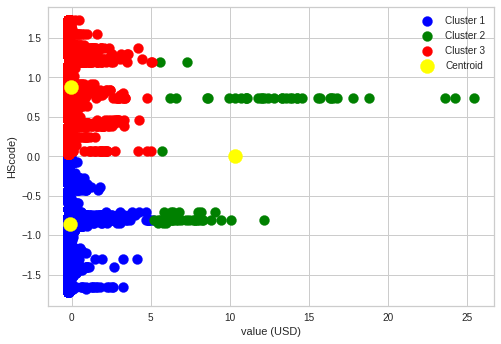

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(data)
np.set_printoptions(threshold=sys.maxsize)
print(y_predict)

#visulaizing the clusters  

plt.scatter(data[y_predict == 0, 0], data[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(data[y_predict == 1, 0], data[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(data[y_predict== 2, 0], data[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
# plt.scatter(data[y_predict == 3, 0], data[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
# plt.scatter(data[y_predict == 4, 0], data[y_predict == 4, 1], s = 100, c = 'orange', label = 'Cluster 4') #for fourth cluster 
# plt.scatter(data[y_predict == 5, 0], data[y_predict == 5, 1], s = 100, c = 'voilet', label = 'Cluster 4') #for fourth cluster   
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   

plt.xlabel('value (USD)')  
plt.ylabel('HScode)')  
plt.legend()  
plt.show()  


In [ ]:
#vaidation matrix Davies-Bouldin Index :
#ratio between the cluster scatter and the cluster's separation and a lower value will mean that the clustering is better
from sklearn.metrics import davies_bouldin_score
 
db_index = davies_bouldin_score(data, y_predict)
print(db_index)

0.5448744380038182


In [ ]:
plt.figure(figsize=(10,6))
model = KMeans(random_state=1)
# k is a range of the number of clusters.
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric="silhouette", timings=True
)
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and generate the plot

{2: 0.6976780545496498, 3: 0.5448744380038182, 4: 0.5585902554265969, 5: 0.5587447355133498, 6: 0.5617016100526399, 7: 0.5928018737419213, 8: 0.6164183811466005, 9: 0.575232246570714, 10: 0.632103635013838}


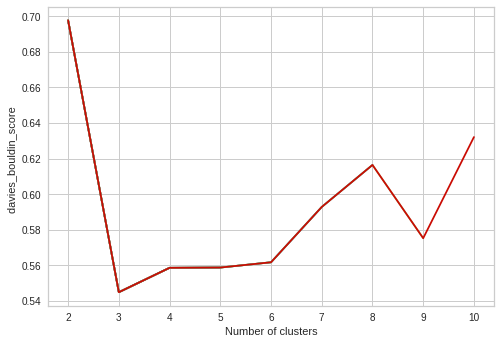

In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    results.update({i: db_index})
    plt.plot(list(results.keys()), list(results.values()))

print(results)
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score  ")
plt.show()


In [ ]:
# from sklearn.metrics import adjusted_rand_score
# ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)

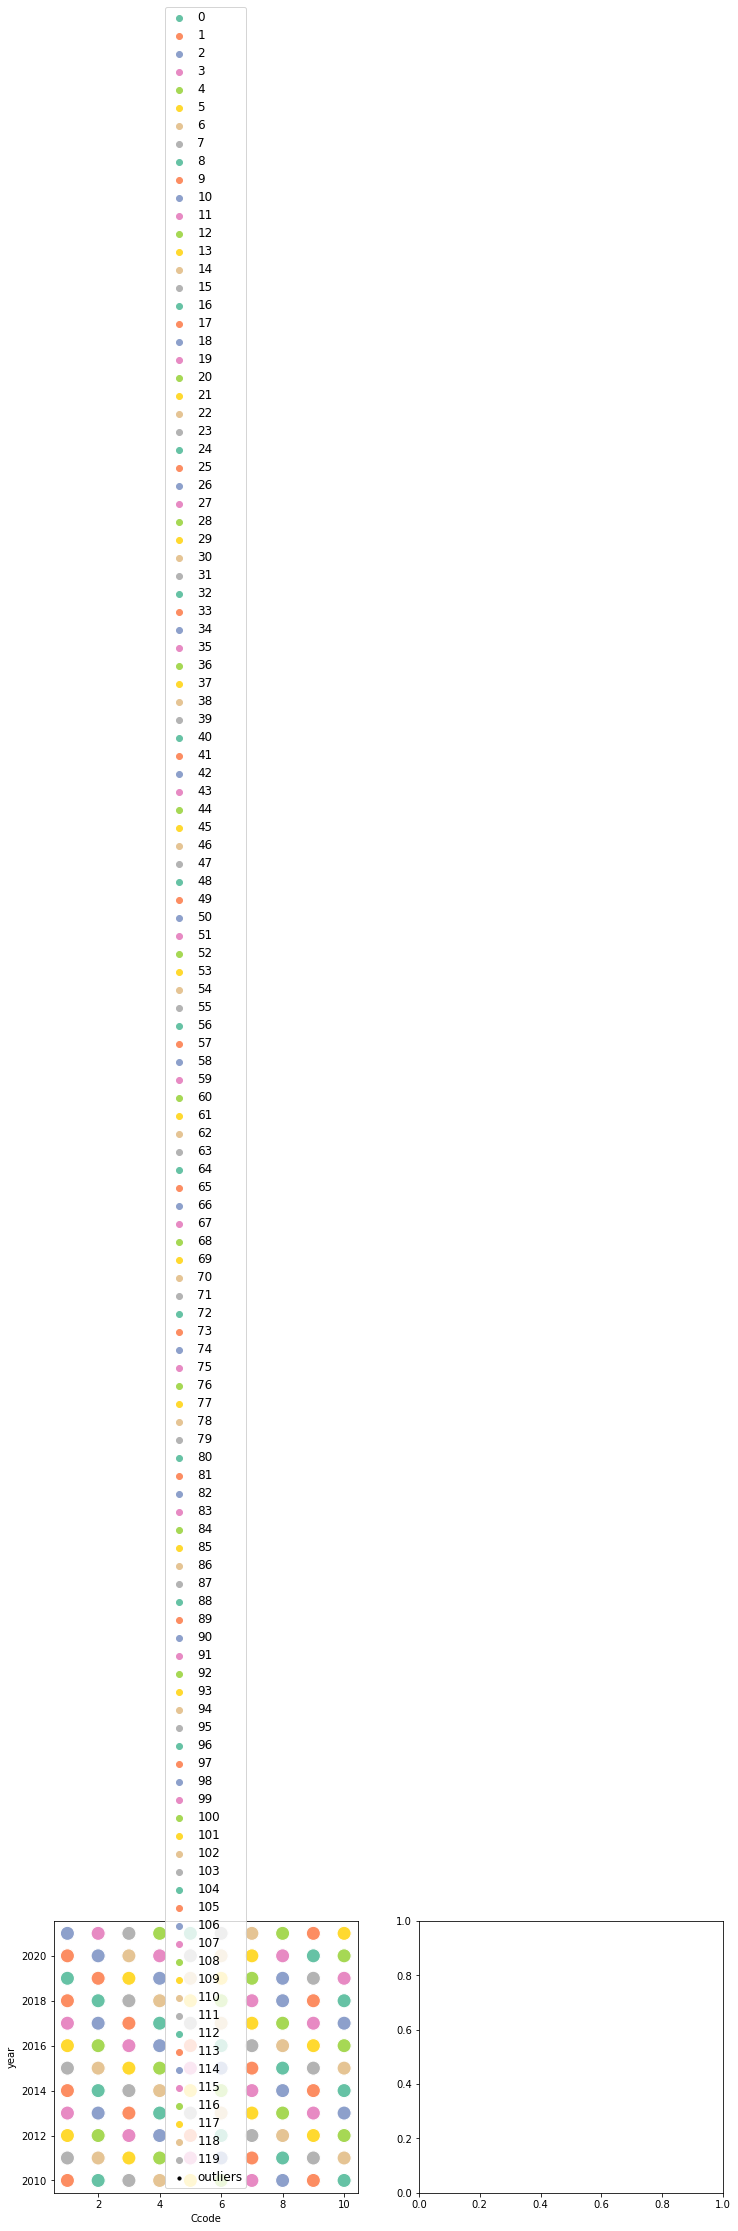

In [ ]:
# X_train = export_data[[ 'Ccode','year']]
# clustering = DBSCAN(eps=0.5, min_samples=4).fit(X_train)
# DBSCAN_dataset = X_train.copy()
# DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 
  

# DBSCAN_dataset.Cluster.value_counts().to_frame()

# outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

# fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

# sns.scatterplot('Ccode', 'year',

#                 data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

#                 hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)


# axes[0].scatter(outliers['Ccode'], outliers['year'], s=10, label='outliers', c="k")



# axes[0].legend()


# plt.setp(axes[0].get_legend().get_texts(), fontsize='12')


# plt.show()



[  0  -1  -1 ... 230 232 231]
['y', 'b', 'g', 'r']


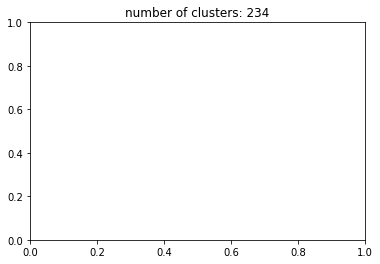

Silhouette Coefficient:-0.31


NameError: ignored

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.cluster import DBSCAN
# from sklearn import metrics

# # from sklearn.datasets.samples_generator import make_blobs
# from sklearn.metrics.cluster import adjusted_rand_score
# from sklearn.preprocessing import StandardScaler
# from sklearn import datasets

# # Load data in X
# X_train = export_data[[ 'value','Ccode','year']]
# db = DBSCAN(eps=0.3, min_samples=5).fit(X_train)
# # DBSCAN_dataset = X_train.copy()
# # DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 


# # X, y_true = make_blobs(n_samples=300, centers=4,
# # 					cluster_std=0.50, random_state=0)
# # db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print(labels)

# # Plot result

# # Black removed and is used for noise instead.
# unique_labels = set(labels)
# colors = ['y', 'b', 'g', 'r']
# print(colors)
# for k, col in zip(unique_labels, colors):
# 	if k == -1:
# 		# Black used for noise.
# 		col = 'k'

# 	class_member_mask = (labels == k)

# 	xy = X_train[class_member_mask & core_samples_mask]
# 	# plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
# 	# 		markeredgecolor='k',
# 	# 		markersize=6)

# 	# xy = X_train[class_member_mask & ~core_samples_mask]
# 	# plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
# 	# 		markeredgecolor='k',
# 	# 		markersize=6)

# plt.title('number of clusters: %d' % n_clusters_)
# plt.show()

# #evaluation metrics
# sc = metrics.silhouette_score(X_train, labels)
# print("Silhouette Coefficient:%0.2f"%sc)
# ari = adjusted_rand_score(y_true, labels)
# print("Adjusted Rand Index: %0.2f"%ari)
